<a href="https://colab.research.google.com/github/vyolete/SystemRecomendations/blob/main/KmeansBookRecomendation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install chart_studio

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.4/64.4 kB 1.8 MB/s eta 0:00:00


In [1]:
pip install plotly


In [2]:
%matplotlib inline
import gdown
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.express as px

In [310]:
# este codigo Solo en Colab
try:
    import google.colab
    !pip install -q gdown
except:
    pass

In [3]:
# Descargar archivos CSV desde Google Drive
id_DataSetFinal = '1_cfAOfeYQ9qikaXPavccG1SnQfWsg-fg'


gdown.download(f'https://drive.google.com/uc?id={id_DataSetFinal}', 'data.csv', quiet=False)


Downloading...
From: https://drive.google.com/uc?id=1_cfAOfeYQ9qikaXPavccG1SnQfWsg-fg
To: /content/data.csv
100%|██████████| 7.61M/7.61M [00:00<00:00, 49.3MB/s]


'data.csv'

In [4]:
# Cargar data para IOS

# Changed error_bad_lines to on_bad_lines
data=pd.read_csv('/content/data.csv', sep=',', on_bad_lines='skip')
data=pd.DataFrame(data)
# Convertir columnas de dataframe en listas
data.columns.tolist()
data.index.tolist()

print (type(data.columns.tolist()))
print (type(data.index.tolist()))

print ('Data read into a pandas dataframe!')
data.shape

<class 'list'>
<class 'list'>
Data read into a pandas dataframe!


(133180, 11)

In [190]:
#Ver los datos
data.head()

,User-ID,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher,Age,City,State,Country
0,276774,3535,6.102771,15827,27899,1995,6299,28,261,81,79
1,276774,62322,6.500000,25125,23956,2002,3642,28,261,81,79
2,276774,62656,6.102771,14242,9475,1989,1700,28,261,81,79
3,276774,63235,9.000000,17291,1011,1992,2424,28,261,81,79
4,276774,64998,10.000000,16105,10256,2000,4680,28,261,81,79


In [191]:
#Ver columnas del data frame
data.columns

Index(['User-ID', 'ISBN', 'Book-Rating', 'Book-Title', 'Book-Author',
       'Year-Of-Publication', 'Publisher', 'Age', 'City', 'State', 'Country'],
      dtype='object')

In [304]:
#Descripcion de los datos
data.describe()

,User-ID,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher,Age,City,State,Country,Age_scaled,Book-Rating_scaled,Year-Of-Publication_scaled,City_scaled,State_scaled,Country_scaled,Publisher_scaled
count,133180.000000,133180.000000,133180.000000,133180.000000,133180.000000,133180.000000,133180.000000,133180.000000,133180.000000,133180.000000,133180.000000,1.331800e+05,1.331800e+05,1.331800e+05,1.331800e+05,1.331800e+05,1.331800e+05,1.331800e+05
mean,140201.751089,33559.415520,7.266939,33874.073464,16389.325634,1995.356217,3417.549737,34.829929,1518.125379,376.879734,41.151397,2.198105e-16,-1.012729e-15,1.419858e-15,-5.698000e-17,-4.951071e-17,1.822506e-16,-9.368622e-17
std,78413.834215,20485.673385,1.497903,19477.659186,9468.471745,7.478535,1989.058220,11.466215,814.025502,210.443365,30.079365,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00
min,8.000000,0.000000,1.000000,0.000000,0.000000,1902.000000,0.000000,5.000000,0.000000,0.000000,0.000000,-2.601560e+00,-4.183823e+00,-1.248327e+01,-1.864967e+00,-1.790891e+00,-1.368099e+00,-1.718181e+00
25%,76626.000000,16608.000000,6.102771,16903.750000,8210.750000,1992.000000,1609.000000,27.000000,783.000000,198.000000,16.000000,-6.828722e-01,-7.772013e-01,-4.487817e-01,-9.030775e-01,-8.500168e-01,-8.361710e-01,-9.092527e-01
50%,141109.000000,31497.000000,7.226804,34308.000000,16217.000000,1997.000000,3542.000000,33.000000,1530.000000,496.000000,30.000000,-1.595938e-01,-2.679443e-02,2.198009e-01,1.458758e-02,5.660464e-01,-3.707338e-01,6.256767e-02
75%,204591.000000,51012.250000,8.000000,51165.000000,24610.000000,2001.000000,5135.000000,42.000000,2183.000000,496.000000,76.000000,6.253239e-01,4.893929e-01,7.546671e-01,8.167768e-01,5.660464e-01,1.158560e+00,8.634522e-01
max,278852.000000,71851.000000,10.000000,66869.000000,32549.000000,2050.000000,6700.000000,100.000000,2910.000000,757.000000,91.000000,5.683682e+00,1.824598e+00,7.306777e+00,1.709873e+00,1.806290e+00,1.657242e+00,1.650260e+00


In [8]:
# Realizamos un muestreo de los datos para ejecutar el modelo solo si es necesario

df_standar = data.sample(frac=0.1, random_state=42)  # 10% del dataset
df_original=df_standar.copy()

In [21]:
# Columnas a escalar
columnas_a_escalar = ['Age', 'Book-Rating', 'Year-Of-Publication',
                      'City', 'State', 'Country', 'Publisher']

# Escalar datos
escalador = StandardScaler()
df_standar = pd.DataFrame(
    escalador.fit_transform(data[columnas_a_escalar]),
    columns=columnas_a_escalar,
    index=data.index  # para poder luego unir
)


In [6]:
df_standar.shape

(133180, 7)

In [22]:
df_standar.head()

,Age,Book-Rating,Year-Of-Publication,City,State,Country,Publisher
0,-0.595659,-0.777201,-0.047632,-1.544337,-1.405988,1.258296,1.448656
1,-0.595659,-0.512011,0.888384,-1.544337,-1.405988,1.258296,0.112843
2,-0.595659,-0.777201,-0.849931,-1.544337,-1.405988,1.258296,-0.863502
3,-0.595659,1.156995,-0.448782,-1.544337,-1.405988,1.258296,-0.499509
4,-0.595659,1.824598,0.620951,-1.544337,-1.405988,1.258296,0.634700


## MiniBatchKMeans

In [23]:
df_original.head()

,User-ID,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher,Age,City,State,Country,Cluster
14643,31466,53960,7.666667,8997,13243,2000,2775,26,1359,496,16,1
76278,164008,67633,10.000000,26595,26789,1995,5084,26,1577,382,76,2
124169,258348,67173,6.102771,65564,2970,1993,5673,39,1097,271,32,0
119537,247129,47785,7.923077,26234,28192,1995,257,26,1391,590,50,0
76440,164027,27919,6.102771,56328,32536,1982,5859,15,416,496,16,2


In [9]:
#Solo ejecutar si se va realizar un muestreo
from sklearn.cluster import MiniBatchKMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm

# Inicializar listas para almacenar resultados
inercia = []
silhouette = []
k_range = range(2, 11)

# Usamos tqdm para ver el progreso
for k in tqdm(k_range, desc="Calculando MiniBatchKMeans"):
    mbkmeans = MiniBatchKMeans(n_clusters=k, random_state=42, batch_size=1000, n_init=10)
    mbkmeans.fit(df_standar)
    inercia.append(mbkmeans.inertia_)
    silhouette.append(silhouette_score(df_standar, mbkmeans.labels_))



Calculando MiniBatchKMeans:   0%|          | 0/9 [00:00<?, ?it/s]

###Kmeans Normal

In [290]:
#Solo ejecutar si se va realizar con todos los datos
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm

# Inicializar listas para almacenar resultados
inercia = []
silhouette = []
k_range = range(2, 11)

# Usamos tqdm para ver el progreso
for k in tqdm(k_range, desc="Calculando KMeans"):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(df_standar)
    inercia.append(kmeans.inertia_)
    silhouette.append(silhouette_score(df_standar, kmeans.labels_))


Calculando KMeans:   0%|          | 0/9 [00:00<?, ?it/s]

KeyboardInterrupt: 

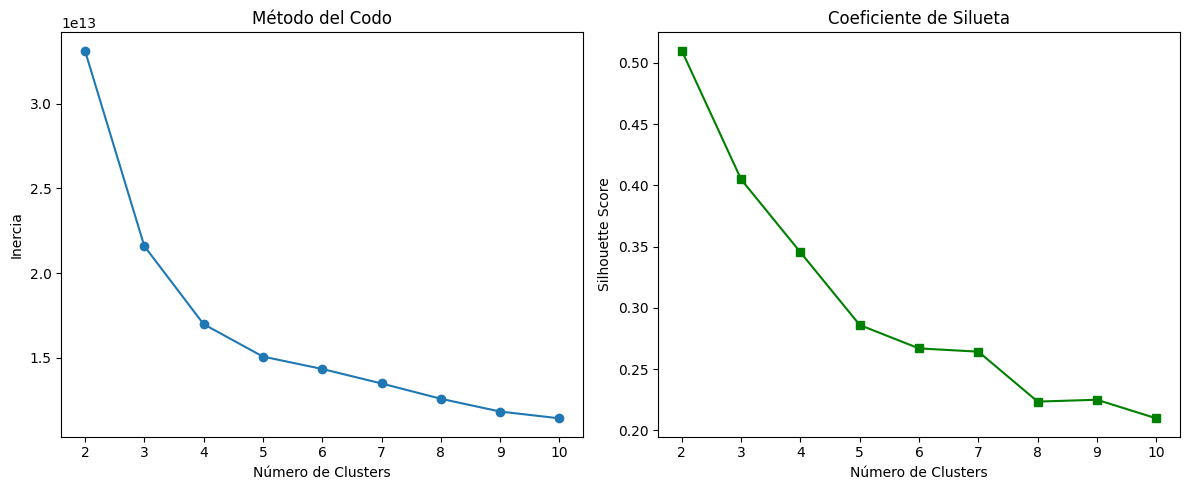

In [10]:
# Gráficas: Método del codo y Silhouette Score
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(k_range, inercia, marker='o')
plt.title('Método del Codo')
plt.xlabel('Número de Clusters')
plt.ylabel('Inercia')

plt.subplot(1, 2, 2)
plt.plot(k_range, silhouette, marker='s', color='green')
plt.title('Coeficiente de Silueta')
plt.xlabel('Número de Clusters')
plt.ylabel('Silhouette Score')

plt.tight_layout()
plt.show()


### Entrenar modelo KMeans con k=3 normal

In [243]:
#Solo ejecutar si se esta trabajando con kmeans y todos los datos

from sklearn.cluster import KMeans

# This cell fits the KMeans model and adds the 'Cluster' column to data_standar
from sklearn.cluster import KMeans

# Entrenamos el modelo con 4 clusters
kmeans_final = KMeans(n_clusters=4, random_state=42, n_init=10)
kmeans_final.fit(df_standar)

# Agregamos la columna de cluster al DataFrame original
df_standar['Cluster'] = kmeans_final.labels_

In [11]:
# Entrenamos el modelo con 2 clusters (ajusta el número según lo que necesites)
kmeans_final = MiniBatchKMeans(n_clusters=3, random_state=42, n_init=10, batch_size=1024)
kmeans_final.fit(df_standar)

# Agregamos la columna de cluster al DataFrame original
df_standar['Cluster'] = kmeans_final.labels_


In [12]:
# Agregamos la columna 'Cluster' a data
df_original['Cluster'] = df_standar['Cluster']

###Visualizar distribución de usuarios por clúster

<ipython-input-13-1203713554>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Cluster', data=df_standar, palette='Set2')


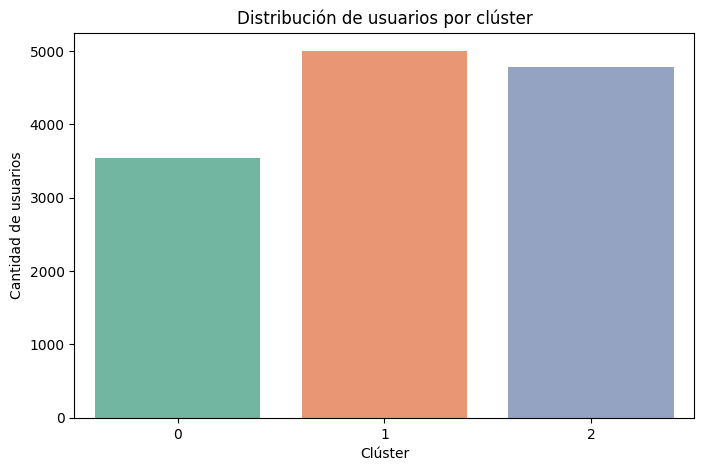

In [13]:
# This cell plots the count of clusters using the updated data_standar DataFrame
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
sns.countplot(x='Cluster', data=df_standar, palette='Set2')
plt.title('Distribución de usuarios por clúster')
plt.xlabel('Clúster')
plt.ylabel('Cantidad de usuarios')
plt.show()


In [18]:
#Visualizacion cluster

fig = px.scatter(
    df_original,
    x='Age',
    y='Year-Of-Publication',
    color=df_original['Cluster'].astype(str),
    title='Clusters según Edad y Año de Publicación',
    opacity=0.7
)
fig.update_traces(marker=dict(size=6))
fig.show()



In [25]:
import plotly.express as px
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import numpy as np

# 📌 KMeans - Visualización de Clusters

# Nota: El modelo kmeans_final ya fue entrenado anteriormente sobre 'data_standar'.
# Por lo tanto, podemos reutilizar el objeto entrenado y sus etiquetas (labels).
# Si deseas volver a entrenar KMeans, asegúrate de hacerlo sobre 'data_standar'.

# Usamos las etiquetas del modelo previamente entrenado
# Note: The cluster labels were added to df_original in a previous step.
# labels = kmeans_final.labels_ # This line is not strictly necessary here as we use df_original['Cluster']

# Creamos un DataFrame para graficar los clusters
# Seleccionamos solo las columnas utilizadas para el clustering y renombramos para visualización
df_plot = df_original[['Age', 'Book-Rating', 'Year-Of-Publication', 'Cluster']].copy() # Include 'Cluster' here
df_plot.columns = ['Edad', 'Puntaje', 'Año', 'Cluster']  # Renombramos para claridad en los ejes del gráfico
df_plot['Cluster'] = df_plot['Cluster'].astype(str)  # Ensure 'Cluster' is string for coloring

# 📊 Gráfico 3D interactivo con Plotly
import plotly.express as px

fig = px.scatter_3d(
    df_plot,
    x='Edad', y='Puntaje', z='Año',
    color='Cluster',
    title='Clusters de libros según Edad, Puntaje y Año',
    opacity=0.6
)

# Configuramos el tamaño de los puntos
fig.update_traces(marker=dict(size=5))

# Mostramos el gráfico interactivo
fig.show()


# 🧠 Análisis: Promedio de variables numéricas por cluster
# Agrupamos por clúster y calculamos la media para entender el perfil de cada grupo
# Perform groupby on df_original as it contains the 'Cluster' column along with original data
print(df_original.groupby('Cluster')[['Age', 'Book-Rating', 'Year-Of-Publication']].mean(numeric_only=True))


               Age  Book-Rating  Year-Of-Publication
Cluster                                             
0        34.400903     7.288431          1995.553077
1        34.519304     7.257333          1995.378276
2        35.288047     7.277639          1995.149676


In [ ]:
# Guardar como HTML interactivo
fig.write_html("Kmeans.html")

In [26]:
print("Filas en data:", len(df_original))
print("Filas en df_standar:", len(df_standar))


Filas en data: 13318
Filas en df_standar: 133180
